In [98]:
from scipy.integrate import quad
import matplotlib.pyplot as plt
import numpy as np

a = 1

In [99]:
def Energy_Dispersion(t_, U_, ed_, n_trial, k_):
    e0 = n_trial*U_/2 - ed_
    return e0 - 2*t_*np.cos(k_*a)

def DOS(om, t_, U_, ed_, n_trial):
    #rho = np.zeros(len(om))
    e0 = n_trial*U_/2 - ed_
    #for i in range(len(om)):
    if np.abs(4*t_*t_ - (om-e0)**2) > 0.02 and 4*t_*t_ - (om-e0)**2 > 0:
        rho = (2/np.pi)*1/np.sqrt(4*t_*t_ - (om-e0)**2)
    else:
        rho = 0

    return rho

def Self_Consistency(mu_, t_, U_, ed_, n_trial):
    e0_trial = n_trial*U_/2
    for i in range(50):
        N, err = quad(DOS, e0_trial-2*t_, mu_, (t_, U_, ed_, n_trial))
        n_trial = N
        e0_trial = n_trial*U_/2

    return N

In [132]:
t = 1
U = 5
ed = -np.arange(-2*U, (2+0.1)*U, 0.1*U)+U/2
n_trial = 1

#omega = np.arange(-2, 2+0.01, 0.01)

#rho = DOS(omega, t, U, ed, n_trial)

#plt.plot(omega, rho)

#plt.ylim(0, 10)

#plt.show()

/tmp/ipykernel_12753/3975189574.py:19: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  N, err = quad(DOS, e0_trial-2*t_, mu_, (t_, U_, ed_, n_trial))
/tmp/ipykernel_12753/3975189574.py:19: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  N, err = quad(DOS, e0_trial-2*t_, mu_, (t_, U_, ed_, n_trial))


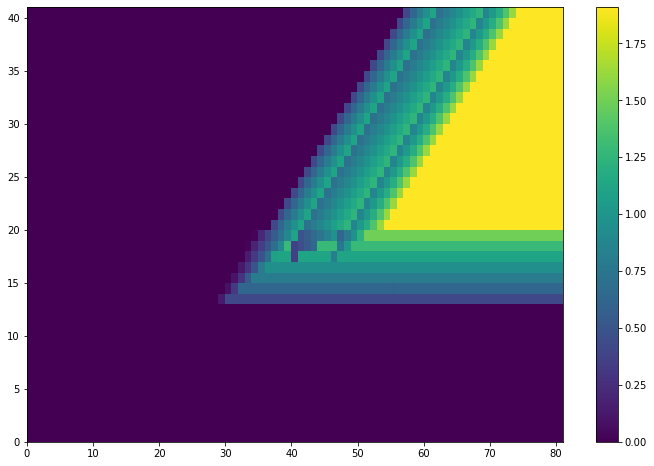

In [105]:
mu = np.arange(-4*U, (4+0.1)*U, 0.1*U)

n = []
for j in range(len(ed)):
    aux = []
    for i in range(len(mu)):
        N = Self_Consistency(mu[i], t, U, ed[j], n_trial)
        if N >= 0:
            aux.append(N)
        else:
            aux.append(0)
    n.append(aux)

n = np.array(n)

fig = plt.figure(figsize = (12, 8))

plt.pcolor(n)
plt.colorbar()

#plt.plot(mu/U, n)
plt.show()


In [120]:
n = []
for j in range(len(ed)):
    aux = []
    for i in range(len(mu)):
        n_ = 1
        for k in range(20):
            n_ = n_ - (-(mu[i] + ed[j]) + U*n_/2 + 2*t*np.sin((n_-1)*np.pi/2))/(U/2 + t*np.pi*np.cos((n_-1)*np.pi/2))
        aux.append(n_)
        
    n.append(aux)

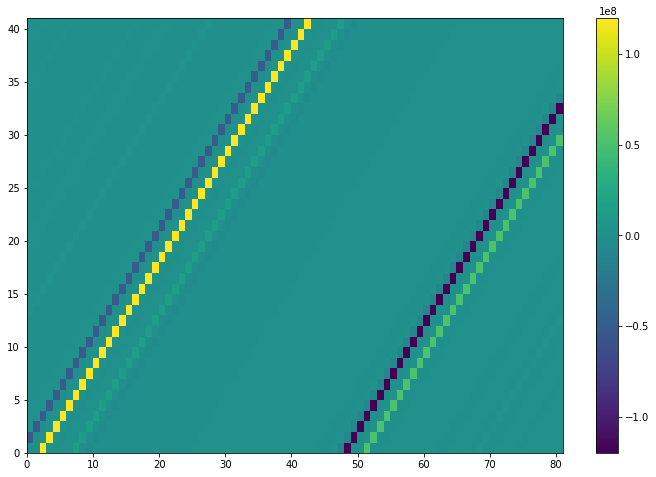

In [121]:
fig = plt.figure(figsize = (12, 8))

plt.pcolor(n)
plt.colorbar()

#plt.plot(mu/U, n)
plt.show()

In [133]:
n = np.arange(0, 2, 0.1)


mu = np.zeros((len(n), len(ed)))
for i in range(len(n)):
    for j in range(len(ed)):
        mu[i][j] = -ed[j]/U + n[i]/2 + (2*t/U)*np.sin((n[i]-1)*np.pi/2)

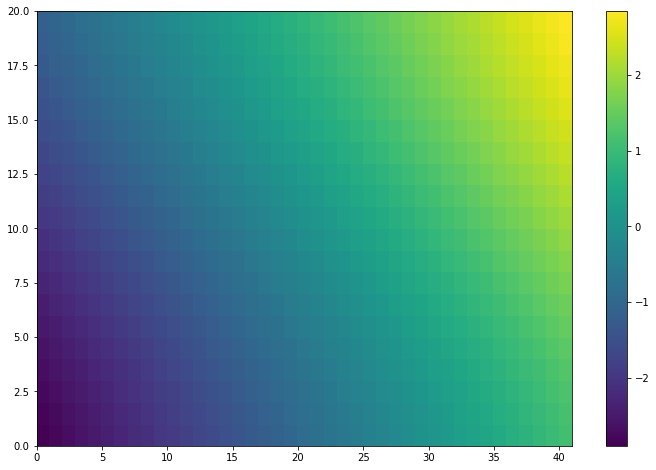

In [134]:
fig = plt.figure(figsize = (12, 8))

plt.pcolor(mu)
plt.colorbar()

#plt.plot(mu/U, n)
plt.show()

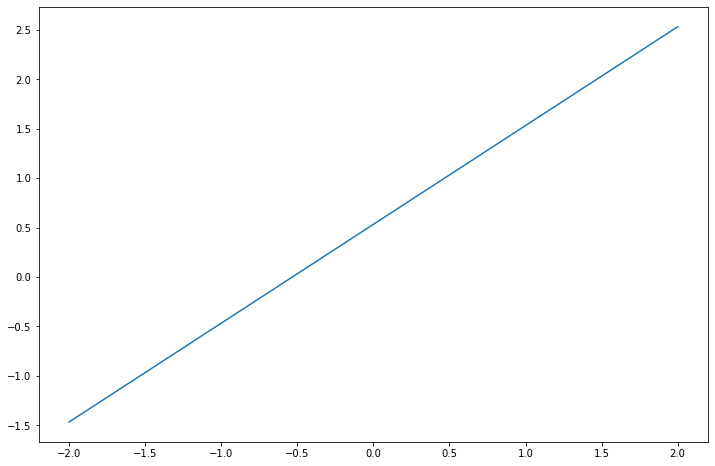

In [138]:
fig = plt.figure(figsize = (12, 8))

plt.plot(1/2 - ed/U, mu[15, :])

plt.show()